<a href="https://colab.research.google.com/github/chandrusuresh/Hands-On-ML/blob/master/Ch6-DecisionTrees/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Decision Trees on the IRIS dataset

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target
idx = []
for yv in np.unique(y):
  idx += np.where(y==yv)

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Gini Impurity
The gini score is an attribute that measures a nodes impurity: a node is "pure" (gini = 0) if all training instances it applies to belong to the same class. It is computed as:

$$ \text{Gini Impurity, } G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 $$
where $p_{i,k}$ is the ratio of instances of class $k$ among the training instances in the $i^{th}$ node.

### Entropy
Entropy measures the average information content of a message. i.e. entropy is zero when messages are identical. In this case, the entropy is zero when all instances belong to the same class. Entropy is computed as:
$$ \text{Entropy, } H_i = - \sum_{k=1}^{n} p_{i,k} \log_2 (p_{i,k}) $$


### Gini vs Entropy
Most of the time there's not much difference between Gini and Entropy. Gini impurity is slightly faster to compute. When they differ, gini impurity tends to isolate most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees. For more info, refer to the [analysis by Sebastian Rachka](https://sebastianraschka.com/faq/docs/decision-tree-binary.html).

### Visualize Decision Tree

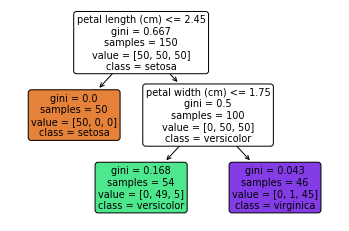

In [6]:
from sklearn.tree import plot_tree
plot_tree(tree_clf,feature_names=iris.feature_names[2:],class_names=iris.target_names,rounded=True,filled=True);

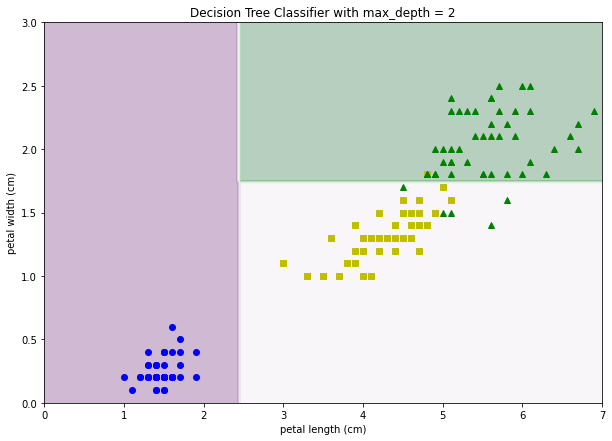

In [12]:
petal_len = np.linspace(0,7,100)
petal_wid = np.linspace(0,3,100)

X0,X1 = np.meshgrid(petal_len,petal_wid)
X_pred = np.c_[np.ravel(X0),np.ravel(X1)]
y_pred = tree_clf.predict(X_pred).reshape(X0.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
ax.plot(X[idx[0],0],X[idx[0],1],'bo')
ax.plot(X[idx[1],0],X[idx[1],1],'ys')
ax.plot(X[idx[2],0],X[idx[2],1],'g^')
ax.contourf(X0,X1,y_pred,cmap='PRGn',alpha=0.3)
ax.set_xlabel(iris.feature_names[2]);
ax.set_ylabel(iris.feature_names[3]);
ax.set_title('Decision Tree Classifier with max_depth = 2');

## Decision Tree Regression
This quadratic training set ( + noise) is adapted from [here](https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb)

In [13]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

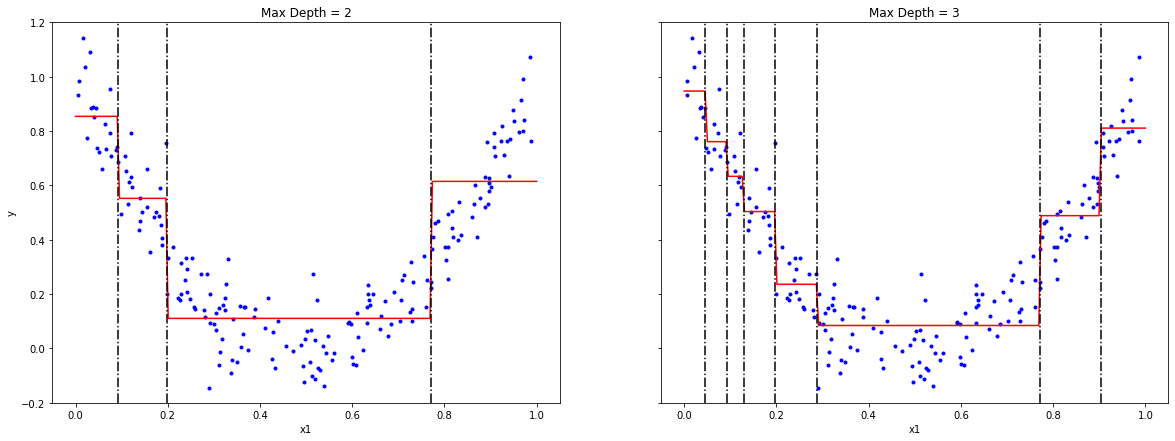

In [41]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg2 = DecisionTreeRegressor(max_depth=3)

tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

thresholds_1 = tree_reg1.tree_.threshold
thresholds_1 = thresholds_1[np.where(thresholds_1 != -2)[0]]
thresholds_2 = tree_reg2.tree_.threshold
thresholds_2 = thresholds_2[np.where(thresholds_2 != -2)[0]]

X_new = np.c_[np.linspace(0,1,m)]
y_pred1 = tree_reg1.predict(X_new)
y_pred2 = tree_reg2.predict(X_new)

fig,ax = plt.subplots(1,2,figsize=(20,7),sharey=True)
ax[0].plot(X,y,'b.')
ax[0].plot(X_new,y_pred1,'r')
for th in thresholds_1:
  ax[0].plot(th*np.ones((5,)),np.linspace(-0.2,1.2,5),'k-.')
ax[0].set_xlabel('x1')
ax[0].set_title('Max Depth = 2');
ax[0].set_ylabel('y')

ax[1].plot(X,y,'b.')
ax[1].plot(X_new,y_pred2,'r')
for th in thresholds_2:
  ax[1].plot(th*np.ones((5,)),np.linspace(-0.2,1.2,5),'k-.')
ax[1].set_xlabel('x1')
ax[1].set_title('Max Depth = 3');
ax[0].set_ylim([-0.2,1.2]);